## Infosys stock price prediction

#### The prediction of the market value is of great importance to help in maximizing the profit of stock option purchase while keeping the risk low. Recurrent neural networks (RNN) have proved one of the most powerful models for processing sequential data. Long Short-Term memory is one of the most successful RNNs architectures. LSTM introduces the memory cell, a unit of computation that replaces traditional artificial neurons in the hidden layer of the network. With these memory cells, networks are able to effectively associate memories and input remote in time, hence suit to grasp the structure of data dynamically over time with high prediction capacity.

#### Importing the necessary libraries and data 

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
dataset_train=pd.read_excel('C:/Users/aksha/Desktop/ai/datasets/Infosys_train.xlsx')
dataset_test=pd.read_excel('C:/Users/aksha/Desktop/ai/datasets/Infosys_test.xlsx')
print(dataset_train.info())
print(dataset_test.info())
dataset_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 7 columns):
Date            2175 non-null datetime64[ns]
Open            2175 non-null object
High            2173 non-null float64
Low             2173 non-null float64
Close*          2173 non-null float64
Adj. close**    2173 non-null float64
Volume          2173 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 119.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
Date            40 non-null datetime64[ns]
Open            40 non-null float64
High            40 non-null float64
Low             40 non-null float64
Close*          40 non-null float64
Adj. close**    40 non-null float64
Volume          40 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 2.3 KB
None


,Date,Open,High,Low,Close*,Adj. close**,Volume
0,2019-05-31,736.5,742.95,733.20,737.75,727.47,8290306.0
1,2019-05-30,727,737.25,722.55,733.55,723.33,15089296.0
2,2019-05-29,725.5,733.65,723.65,727.80,717.66,10293077.0
3,2019-05-28,712,733.45,709.80,728.10,717.96,23860490.0
4,2019-05-27,707.4,713.80,705.50,708.10,698.24,10247544.0


#### We have taken train and test data as dataset_train and dataset_test respectively. There are 7 columns namely Date, Open price,  Highest value for the day, Lowest value for the day, Close price, Adjusted close value and Volume.

#### We can see that there are a few null values in the train data, hence we remove them 

In [12]:
dataset_train=dataset_train.replace('-',np.nan)
dataset_train=dataset_train.dropna()
print(dataset_train.info())
dataset_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2174
Data columns (total 7 columns):
Date            2173 non-null datetime64[ns]
Open            2173 non-null object
High            2173 non-null float64
Low             2173 non-null float64
Close*          2173 non-null float64
Adj. close**    2173 non-null float64
Volume          2173 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 135.8+ KB
None


(2173, 7)

#### We take only the Open price for our analysis 

In [13]:
training_set = dataset_train.iloc[:, 1:2].values

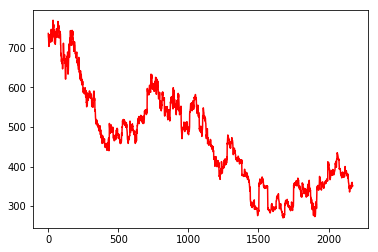

In [14]:
plt.plot(training_set, color = 'red', label = ' Stock Price')

In [15]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

C:\Users\Vivek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.933  ],
       [0.914  ],
       [0.911  ],
       ...,
       [0.16126],
       [0.16   ],
       [0.16376]])

#### Creating a data structure with 60 timesteps and 1 output

In [16]:
X_train = []
y_train = []
for i in range(60, 2173):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2113, 60, 1)

#### Importing the Keras libraries and packages

In [18]:
#Building the RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [19]:
# Initialising the RNN
regressor = Sequential()

In [20]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [23]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [24]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [25]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
X_train.shape

(2113, 60, 1)

In [27]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2113/2113 [==============================] - 22s 10ms/step - loss: 0.0239
Epoch 2/100
2113/2113 [==============================] - 14s 7ms/step - loss: 0.0042
Epoch 3/100
2113/2113 [==============================] - 14s 7ms/step - loss: 0.0041
Epoch 4/100
2113/2113 [==============================] - 14s 6ms/step - loss: 0.0038
Epoch 5/100
2113/2113 [==============================] - 13s 6ms/step - loss: 0.0037
Epoch 6/100
2113/2113 [==============================] - 14s 6ms/step - loss: 0.0031
Epoch 7/100
2113/2113 [==============================] - 13s 6ms/step - loss: 0.0031
Epoch 8/100
2113/2113 [==============================] - 14s 6ms/step - loss: 0.0031
Epoch 9/100
2113/2113 [==============================] - 13s 6ms/step - loss: 0.0031
Epoch 10/100
2113/2113 [==============================] - 13s 6ms/step - loss: 0.0027
Epoch 11/100
2113/2113 [==============================] - 13s 6ms/step - loss: 0.0030
Epoch 12/100
2

#### Making predictions and visualizing the results

In [28]:
real_stock_price = dataset_test.iloc[:, 1:2].values

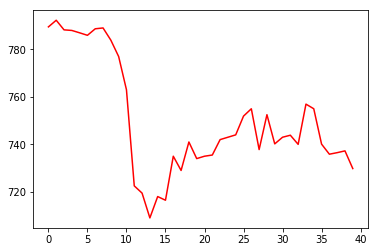

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')

In [30]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

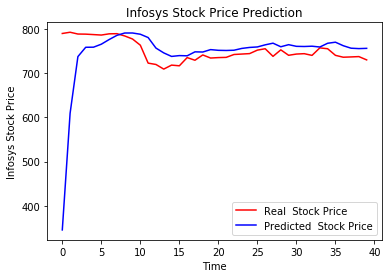

In [31]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real  Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted  Stock Price')
plt.title('Infosys Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Infosys Stock Price')
plt.legend()
plt.show()

#### Saving the model using pickle

In [32]:
import pickle

In [33]:
filename = 'finalized_model.sav'
pickle.dump(regressor, open(filename, 'wb')) 

#### The model will be saved as 'finalized_model' and this model can be imported and reused